In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing

In [115]:
#from library impport necessary function
import pandas as pd
import numpy as np
import sklearn.linear_model as skl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score

In [2]:
bank = pd.read_csv('./bank/bank.csv',sep=';')
bank_full = pd.read_csv('./bank/bank-full.csv',sep=';')
bank_additional = pd.read_csv('./bank-additional/bank-additional/bank-additional.csv',sep=';')
bank_additional_full = pd.read_csv('./bank-additional/bank-additional/bank-additional-full.csv',sep=';')

In [3]:
bank_additional_full.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [85]:
#delete duplicate raws
bank_additional_full.drop_duplicates(inplace = True)

In [38]:
# As we know, there are lots of data, whose value is unknown.
# We decide to delete these by drop them
flags = []
for i in range(len(bank_additional_full)):
    flag = sum('unknown' == bank_additional_full.iloc[i])
    flags.append(flag)

In [41]:
flags = [True if flags[i] >0 else False for i in range(len(flags))]

In [46]:
# drop raws with unknown values
bank_additional_full_nuk = bank_additional_full.drop(bank_additional_full[flags].index)

In [57]:
describe = bank_additional_full_nuk.describe()

In [53]:
print('Before dropping raws, the number of raws is {}, while after fliterring it becomes {}'.format(len(bank_additional_full),len(bank_additional_full_nuk)))

Before dropping raws, the number of raws is 41176, while after fliterring it becomes 30478


In [63]:
# The next step is to standardize data
# we use function to confine the values with mean = 0, std = 1

In [55]:
def standardize(x):
    """Standardize the original data set."""
    centered_data = x - np.mean(x, axis=0)
    std_data = centered_data / np.std(centered_data, axis=0)
    
    return std_data


In [61]:
for i in range(len(describe.columns)):
    bank_additional_full_nuk[describe.columns[i]] = standardize(bank_additional_full_nuk[describe.columns[i]])

In [62]:
bank_additional_full_nuk.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,3.047800e+04,3.047800e+04,3.047800e+04,30478.000000,3.047800e+04,3.047800e+04,3.047800e+04,3.047800e+04,3.047800e+04,3.047800e+04
mean,-2.275378e-16,5.501939e-17,3.730128e-17,0.000000,-8.952307e-17,5.968205e-17,2.452932e-14,1.790461e-16,1.193641e-16,-8.355486e-15
std,1.000016e+00,1.000016e+00,1.000016e+00,1.000016,1.000016e+00,1.000016e+00,1.000016e+00,1.000016e+00,1.000016e+00,1.000016e+00
min,-2.132062e+00,-9.914841e-01,-5.593635e-01,-4.748317,-3.716853e-01,-2.067078e+00,-2.259094e+00,-2.129471e+00,-1.590141e+00,-2.624025e+00
25%,-7.771241e-01,-5.979669e-01,-5.593635e-01,0.211923,-3.716853e-01,-1.073462e+00,-7.659874e-01,-4.379928e-01,-1.208077e+00,-8.211336e-01
50%,-1.964364e-01,-2.999637e-01,-1.917773e-01,0.211923,-3.716853e-01,7.274669e-01,-1.356027e-01,-2.500508e-01,7.855248e-01,4.016395e-01
75%,5.778139e-01,2.349140e-01,1.758089e-01,0.211923,-3.716853e-01,9.137700e-01,8.039951e-01,8.776012e-01,8.446070e-01,8.952726e-01
max,5.416878e+00,1.779800e+01,1.487926e+01,0.211923,1.301639e+01,9.137700e-01,2.124557e+00,2.861433e+00,8.918727e-01,8.952726e-01


In [64]:
# well, for now, the rest columns are not values, and they are all not number but string. 
# Therefore, we decide to take another method to handle them

In [71]:
describe.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

In [76]:
features_not_number = bank_additional_full_nuk.drop(columns = describe.columns,axis=1)

In [78]:
# Here we delete some unrelated features like date and contact method, and, of course, the result
features_not_number.drop(columns=['month','day_of_week','y','contact'],inplace = True)

In [79]:
features_not_number.head()

,job,marital,education,default,housing,loan,poutcome
0,housemaid,married,basic.4y,no,no,no,nonexistent
2,services,married,high.school,no,yes,no,nonexistent
3,admin.,married,basic.6y,no,no,no,nonexistent
4,services,married,high.school,no,no,yes,nonexistent
6,admin.,married,professional.course,no,no,no,nonexistent


In [83]:
#Converting all categorical variable to numerical
features_not_number = pd.get_dummies(features_not_number)

In [84]:
features_not_number.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,education_university.degree,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,poutcome_failure,poutcome_nonexistent,poutcome_success
0,0,0,0,1,0,0,0,0,0,0,...,0,1,0,1,0,1,0,0,1,0
2,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,1,1,0,0,1,0
3,1,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,1,0,0,1,0
4,0,0,0,0,0,0,0,1,0,0,...,0,1,0,1,0,0,1,0,1,0
6,1,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,1,0,0,1,0


In [93]:
bank_additional_full_nuk[describe.columns].head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,1.642408,0.005681,-0.559363,0.211923,-0.371685,0.727467,0.803995,0.877601,0.786088,0.401639
2,-0.196436,-0.128039,-0.559363,0.211923,-0.371685,0.727467,0.803995,0.877601,0.786088,0.401639
3,0.093908,-0.414580,-0.559363,0.211923,-0.371685,0.727467,0.803995,0.877601,0.786088,0.401639
4,1.642408,0.181426,-0.559363,0.211923,-0.371685,0.727467,0.803995,0.877601,0.786088,0.401639
6,1.932752,-0.460427,-0.559363,0.211923,-0.371685,0.727467,0.803995,0.877601,0.786088,0.401639


In [108]:
# Then combine all these features togeter
features = pd.concat([features_not_number,bank_additional_full_nuk[describe.columns]], axis=1)

In [109]:
features.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,0,0,0,1,0,0,0,0,0,0,...,1.642408,0.005681,-0.559363,0.211923,-0.371685,0.727467,0.803995,0.877601,0.786088,0.401639
2,0,0,0,0,0,0,0,1,0,0,...,-0.196436,-0.128039,-0.559363,0.211923,-0.371685,0.727467,0.803995,0.877601,0.786088,0.401639
3,1,0,0,0,0,0,0,0,0,0,...,0.093908,-0.414580,-0.559363,0.211923,-0.371685,0.727467,0.803995,0.877601,0.786088,0.401639
4,0,0,0,0,0,0,0,1,0,0,...,1.642408,0.181426,-0.559363,0.211923,-0.371685,0.727467,0.803995,0.877601,0.786088,0.401639
6,1,0,0,0,0,0,0,0,0,0,...,1.932752,-0.460427,-0.559363,0.211923,-0.371685,0.727467,0.803995,0.877601,0.786088,0.401639


In [160]:
result = list(bank_additional_full_nuk.y)

In [161]:
result = pd.DataFrame([1 if result[i] == 'yes' else 0 for i in range(len(result))])

In [162]:
len(result) == len(features)

True

#### These three model all use regression and with nearly the same mathod. Therefore, here, we choose to use function to reduce the code size and make it more readable
## Configuration of Function
#### 1. set solver of logistic regression as "newton-cg" solver
##### "newton-cg" solver can handle with or without L2 penalty. And compared with other solvers it can provide better performance for both with or without penalty
#### 2. Split the data 
##### Using split function from sklearn to split these data set into 10 folds, where 9 of them are used as train data set and 1 of them as test data. Then change the position test data until all of them are trained and test. Avarage the parameters of the model to form a new model
#### 3. Data shuffle
##### All data sets are shuffled before further process

In [163]:
def roc_auc_process(df,warstds,pattern = 0,penalty = 'none'):
    '''run this function to calculate and draw ROC,
       if pattern is 0, then output the plot,
       if pattern is 1, then draw nothing
    '''
    if penalty == 'none': # C represent the strenth of Inverse of regularization strength
        C = 1.0 #if no penalty, set C to 1.0
    else:
        C = 5.0 # if with penalty =, set C to 5.0
    #split the data into train and test part, where test count for 10%
    cv = StratifiedKFold(n_splits=10,random_state= 0, shuffle = True)#10-fold cross validation
    classifier = skl.LogisticRegression(solver='newton-cg',penalty= penalty,max_iter=10000, C = C)# set penalty, set max_iter as 10000
    y_pre = cross_val_predict(classifier,df,warstds,cv=cv,method='predict_proba')
    fpr,tpr,_ = roc_curve(warstds,y_pre[:,1],pos_label=1) # True positive rate and False positive rate
    roc_auc = auc(fpr,tpr) # calculate AUC
    if pattern ==0:
        fig, ax = plt.subplots()
        ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
                label='Chance', alpha=.8) # taken as reference
        ax.plot(fpr, tpr, linestyle='-.',color='b',
                label=r'Mean ROC (AUC = %0.2f )' % (roc_auc),
                lw=2, alpha=.8)
        plt.legend(loc='lower right')
    else:
        None
    return fpr, tpr, roc_auc

In [175]:
# calculate the ROC for data using no penalty
fpr, tpr, roc_auc = roc_auc_process(features,result[0],pattern = 1)

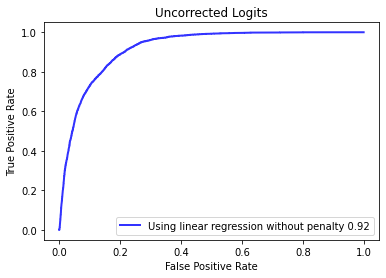

In [176]:
mean_fpr = np.linspace(0, 1, 100)#False postive rate
fig, ax = plt.subplots()
ax.plot(fpr, tpr, color='b', linestyle='-',
        label=r'Using linear regression without penalty %0.2f' % (roc_auc_FL),
        lw=2, alpha=.8)
plt.legend(loc='lower right')# set the location of legen
plt.title('Uncorrected Logits')#set title 
plt.xlabel('False Positive Rate')# set label of X-axis
plt.ylabel('True Positive Rate')# set label of Y-axis
plt.savefig('Uncorrected Logits')#save fig 
plt.show()

In [177]:
# calculate the ROC for data using _l2 penalty
fpr_l2, tpr_l2, roc_auc_l2 = roc_auc_process(features,result[0],pattern = 1,penalty='l2')

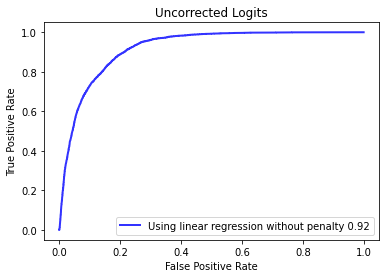

In [178]:
mean_fpr = np.linspace(0, 1, 100)#False postive rate
fig, ax = plt.subplots()
ax.plot(fpr_l2, tpr_l2, color='b', linestyle='-',
        label=r'Using linear regression without penalty %0.2f' % (roc_auc_l2),
        lw=2, alpha=.8)
plt.legend(loc='lower right')# set the location of legen
plt.title('Uncorrected Logits')#set title 
plt.xlabel('False Positive Rate')# set label of X-axis
plt.ylabel('True Positive Rate')# set label of Y-axis
plt.savefig('Uncorrected Logits')#save fig 
plt.show()